---

### **📊 Matiks - Data Analyst Task**

---

## Task Objective
Analyze user-level behavioral and revenue data (dataset) and help us understand what's working, what’s not, and where the opportunities lie.

## What I Worked On
- Build an interactive dashboard
- Track DAU / WAU / MAU
- Visualize revenue trends over time
- Provide breakdowns by device type, user segment, or game mode
- Use tools like Tableau, Power BI, Streamlit, Looker Studio
- Identify and summarize key insights
- Behavioral patterns (e.g., active days, usage frequency)
- Early signs of churn (e.g., time gaps, short session users)
- Characteristics of high-value or high-retention users
- Suggestions on how we could improve retention or revenue
- Create a short insights report (3-5 slides/pages)
- Highlight top findings with supporting visuals
- Include brief recommendations backed by data
- Keep it focused and actionable

## Planned for Future
- Cohort analysis using signup/first seen date
- Funnel tracking (e.g., onboarding → first game → repeat session)
- Simple clustering for user segmentation (e.g., frequency vs revenue)
---

### 📅 1. EDA 

**Importing libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
file = r"data\Sheet1.csv"
data = pd.read_csv(file)

**Basic Dataset Info**

In [ ]:

data.head()

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,15-Dec-2024,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,19-May-2025,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,07-Mar-2024,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,12-May-2025,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,19-Oct-2023,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,03-May-2025,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,christopher90,ttaylor@gmail.com,28-Sep-2023,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,08-May-2025,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,09-Aug-2024,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,24-Apr-2025,Free,Friend,Multiplayer,Diamond,2666


In [10]:
data.columns


Index(['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Age',
       'Gender', 'Device_Type', 'Game_Title', 'Total_Play_Sessions',
       'Avg_Session_Duration_Min', 'Total_Hours_Played',
       'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Last_Login',
       'Subscription_Tier', 'Referral_Source', 'Preferred_Game_Mode',
       'Rank_Tier', 'Achievement_Score'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Username                  10000 non-null  object 
 2   Email                     10000 non-null  object 
 3   Signup_Date               10000 non-null  object 
 4   Country                   10000 non-null  object 
 5   Age                       10000 non-null  int64  
 6   Gender                    10000 non-null  object 
 7   Device_Type               10000 non-null  object 
 8   Game_Title                10000 non-null  object 
 9   Total_Play_Sessions       10000 non-null  int64  
 10  Avg_Session_Duration_Min  10000 non-null  float64
 11  Total_Hours_Played        10000 non-null  float64
 12  In_Game_Purchases_Count   10000 non-null  int64  
 13  Total_Revenue_USD         10000 non-null  float64
 14  Last_Lo

In [12]:
data.describe()

,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Achievement_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,31.063700,19.993900,30.035238,100.216981,4.97600,50.177466,5009.304400
std,10.687547,4.492314,10.062647,49.642141,2.23623,49.600884,2895.010702
min,13.000000,6.000000,-5.640000,-89.730000,0.00000,0.000000,0.000000
25%,22.000000,17.000000,23.210000,66.490000,3.00000,14.900000,2481.750000
50%,31.000000,20.000000,29.860000,100.435000,5.00000,34.760000,5067.000000
75%,40.000000,23.000000,36.902500,133.900000,6.00000,69.225000,7498.250000
max,49.000000,42.000000,75.620000,283.260000,17.00000,428.590000,9997.000000


In [14]:
data.shape

(10000, 20)

**Check for Missing Values**

In [15]:
data.isnull().sum()

User_ID                     0
Username                    0
Email                       0
Signup_Date                 0
Country                     0
Age                         0
Gender                      0
Device_Type                 0
Game_Title                  0
Total_Play_Sessions         0
Avg_Session_Duration_Min    0
Total_Hours_Played          0
In_Game_Purchases_Count     0
Total_Revenue_USD           0
Last_Login                  0
Subscription_Tier           0
Referral_Source             0
Preferred_Game_Mode         0
Rank_Tier                   0
Achievement_Score           0
dtype: int64

**No null values found**

**Check for Duplicates**

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

**No duplicates found**

**Dropping Columns Not Needed**
- Username
 - Email

In [23]:
data.drop(columns=['Username', 'Email'], inplace=True)
data.head()

,User_ID,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,15-Dec-2024,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,19-May-2025,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,07-Mar-2024,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,12-May-2025,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,19-Oct-2023,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,03-May-2025,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,28-Sep-2023,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,08-May-2025,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,09-Aug-2024,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,24-Apr-2025,Free,Friend,Multiplayer,Diamond,2666


**Data Type Conversion**
- Signup_Date
- Last_Login

In [25]:
data['Signup_Date'] = pd.to_datetime(data['Signup_Date'], errors = 'coerce')
data['Last_Login'] = pd.to_datetime(data['Last_Login'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   User_ID                   10000 non-null  object        
 1   Signup_Date               10000 non-null  datetime64[ns]
 2   Country                   10000 non-null  object        
 3   Age                       10000 non-null  int64         
 4   Gender                    10000 non-null  object        
 5   Device_Type               10000 non-null  object        
 6   Game_Title                10000 non-null  object        
 7   Total_Play_Sessions       10000 non-null  int64         
 8   Avg_Session_Duration_Min  10000 non-null  float64       
 9   Total_Hours_Played        10000 non-null  float64       
 10  In_Game_Purchases_Count   10000 non-null  int64         
 11  Total_Revenue_USD         10000 non-null  float64       
 12  Last_Login         

In [26]:
data.head()

,User_ID,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,2025-05-03,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,2023-09-28,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,2025-05-08,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,2024-08-09,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,NaT,Free,Friend,Multiplayer,Diamond,2666


**Convert Categoricals**

In [27]:
categorical_col = [
    'Country',
    'Gender',
    'Device_Type',
    'Game_Title',
    'Subscription_Tier',
    'Referral_Source',
    'Preferred_Game_Mode',
    'Rank_Tier'
    
]
data[categorical_col] = data[categorical_col].astype('category')

**Creating New Columns**
- Total_Minutes_Played
- Avg_Minutes_Per_Session
- Revenue_Per_Session

In [34]:
data['Total_Minutes_Played'] = data['Total_Hours_Played'] * 60
data['Avg_Minutes_Per_Session'] = data['Total_Minutes_Played'] / data['Total_Play_Sessions']
data['Revenue_Per_Session_USD'] = data['Total_Revenue_USD'] / data['Total_Play_Sessions']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   User_ID                   10000 non-null  object        
 1   Signup_Date               10000 non-null  datetime64[ns]
 2   Country                   10000 non-null  category      
 3   Age                       10000 non-null  int64         
 4   Gender                    10000 non-null  category      
 5   Device_Type               10000 non-null  category      
 6   Game_Title                10000 non-null  category      
 7   Total_Play_Sessions       10000 non-null  int64         
 8   Avg_Session_Duration_Min  10000 non-null  float64       
 9   Total_Hours_Played        10000 non-null  float64       
 10  In_Game_Purchases_Count   10000 non-null  int64         
 11  Total_Revenue_USD         10000 non-null  float64       
 12  Last_Login         

**Last_Login Has Missing Values (6972 non-null)
That’s ~30% missing, which is a flag for churn.**

 - Create a Has_Logged_In flag

In [38]:
data['Has_Logged_In'] = data['Last_Login'].notnull().astype(int)
data.head()

,User_ID,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,...,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Total_Minutes_Played,Avg_Minutes_Per_Session,Revenue_Per_Session_USD,Has_Logged_In
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,...,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,2304.6,109.742857,1.309524,1
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,...,2025-05-12,Gold,Ads,Solo,Bronze,3572,7741.2,351.872727,0.113636,1
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,...,2025-05-03,Silver,Organic,Solo,Platinum,1060,3750.0,312.500000,2.130000,1
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,2023-09-28,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,...,2025-05-08,Silver,Friend,Multiplayer,Diamond,3591,4764.0,250.736842,6.960526,1
4,0b620a32-9e77-4b4a-9931-f0b654bef095,2024-08-09,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,...,NaT,Free,Friend,Multiplayer,Diamond,2666,5202.0,289.000000,1.155000,0


In [39]:
data['Has_Logged_In'].value_counts()

Has_Logged_In
1    6972
0    3028
Name: count, dtype: int64

**Creating Recency Column for Furthur Churn Analysis**

In [40]:
reference_date = data['Last_Login'].max()
data['Recency_Days'] = (reference_date - data['Last_Login']).dt.days
# handling cases of never logged in 
data['Recency_Category'] = data['Recency_Days'].apply(
    lambda x: 'Never Logged In' if pd.isna(x) else 'Logged In'
)
data.head()

,User_ID,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,...,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Total_Minutes_Played,Avg_Minutes_Per_Session,Revenue_Per_Session_USD,Has_Logged_In,Recency_Days,Recency_Category
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,...,Social Media,Co-op,Bronze,8721,2304.6,109.742857,1.309524,1,2.0,Logged In
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,...,Ads,Solo,Bronze,3572,7741.2,351.872727,0.113636,1,9.0,Logged In
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,...,Organic,Solo,Platinum,1060,3750.0,312.500000,2.130000,1,18.0,Logged In
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,2023-09-28,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,...,Friend,Multiplayer,Diamond,3591,4764.0,250.736842,6.960526,1,13.0,Logged In
4,0b620a32-9e77-4b4a-9931-f0b654bef095,2024-08-09,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,...,Friend,Multiplayer,Diamond,2666,5202.0,289.000000,1.155000,0,NaN,Never Logged In


In [73]:
print(reference_date)

2025-05-21 00:00:00


**Univariate Analysis**

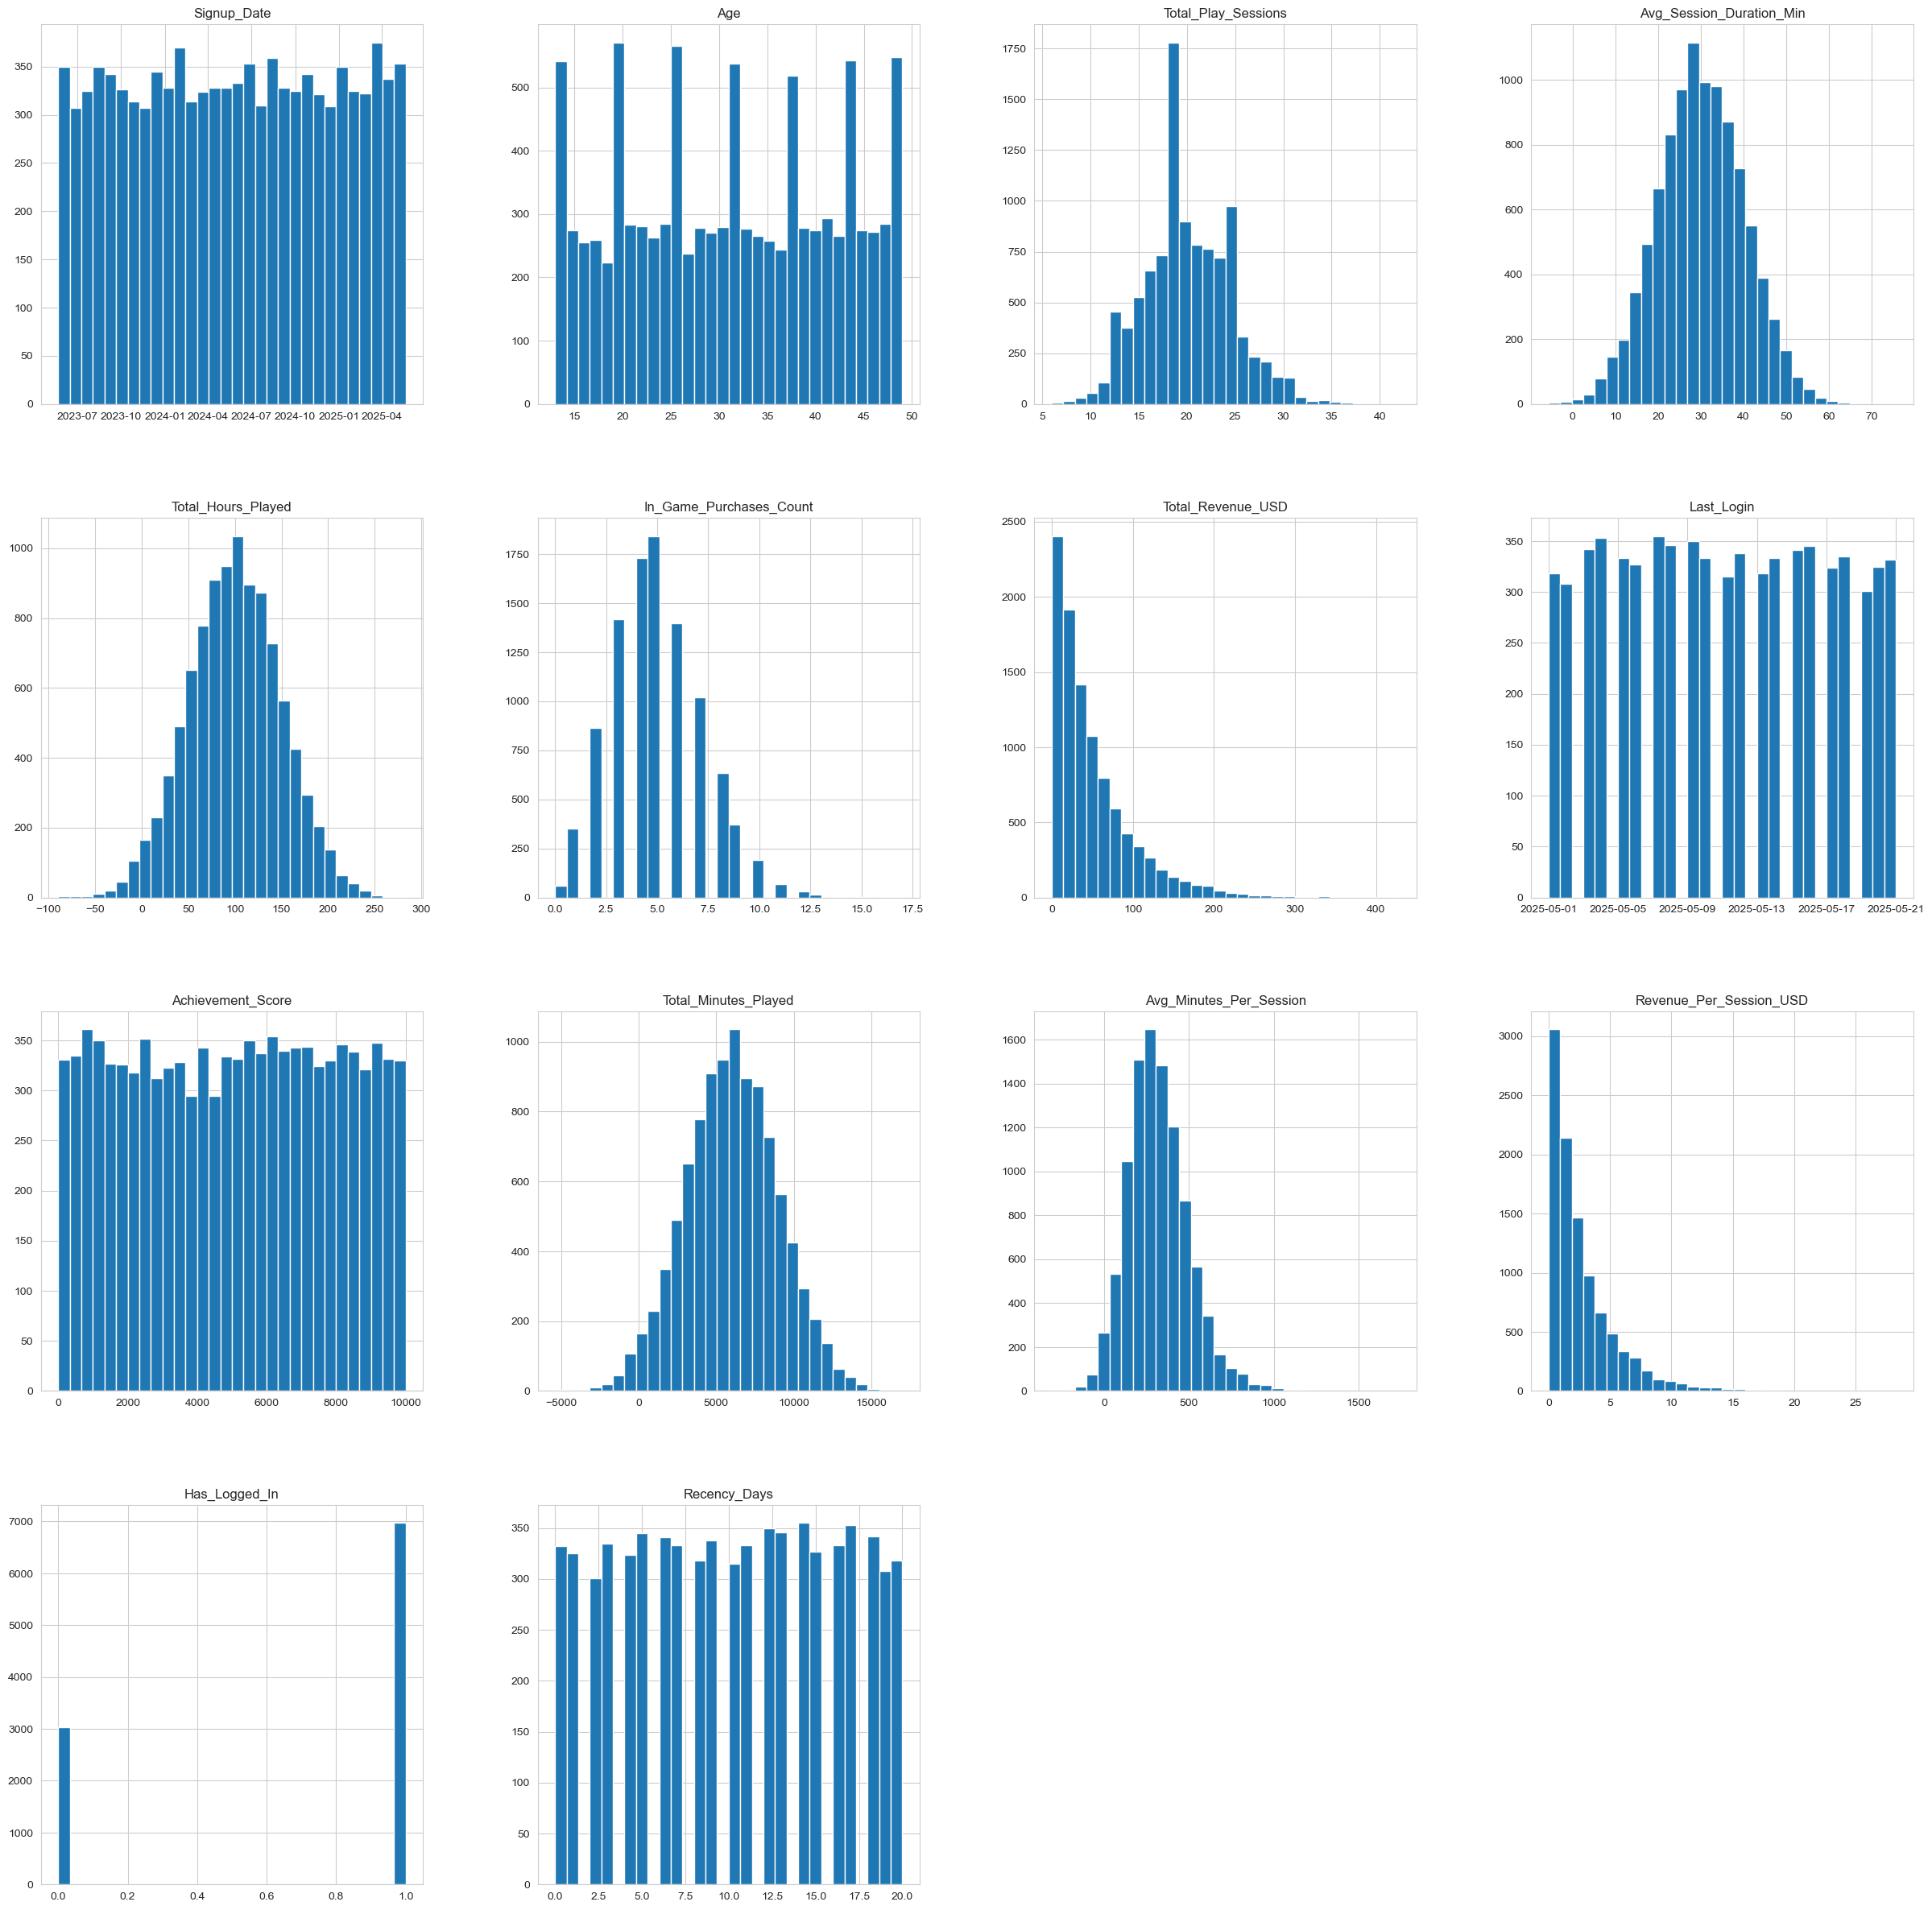

In [56]:
data.hist(figsize=(30, 30), bins=30)
plt.show()



## Use Behavior Insights


 **Age Distribution**
Users are mostly concentrated between 15–45 years.

**Total Play Sessions & Duration**
Majority of users played 15–25 sessions.

Session duration and total minutes/hours played follow a normal distribution.

Avg. session duration peaks around 30 minutes, a healthy sign for engagement.

**Recency & Logins**
Recency_Days peaks between 12–18 days, so users aren’t logging in very frequently.

~30% of users never logged back in → potential early churn segment.


**MONETIZATION INSIGHTS**
 - In-Game Purchases & Revenue
Most users made 0–5 purchases. Tail thins quickly beyond that.

Revenue is highly skewed — majority of users generate low revenue, but a small group drives very high spend.

**Achievement Score**
Flat distribution suggests it might be evenly assigned or capped, not purely performance-based.


---

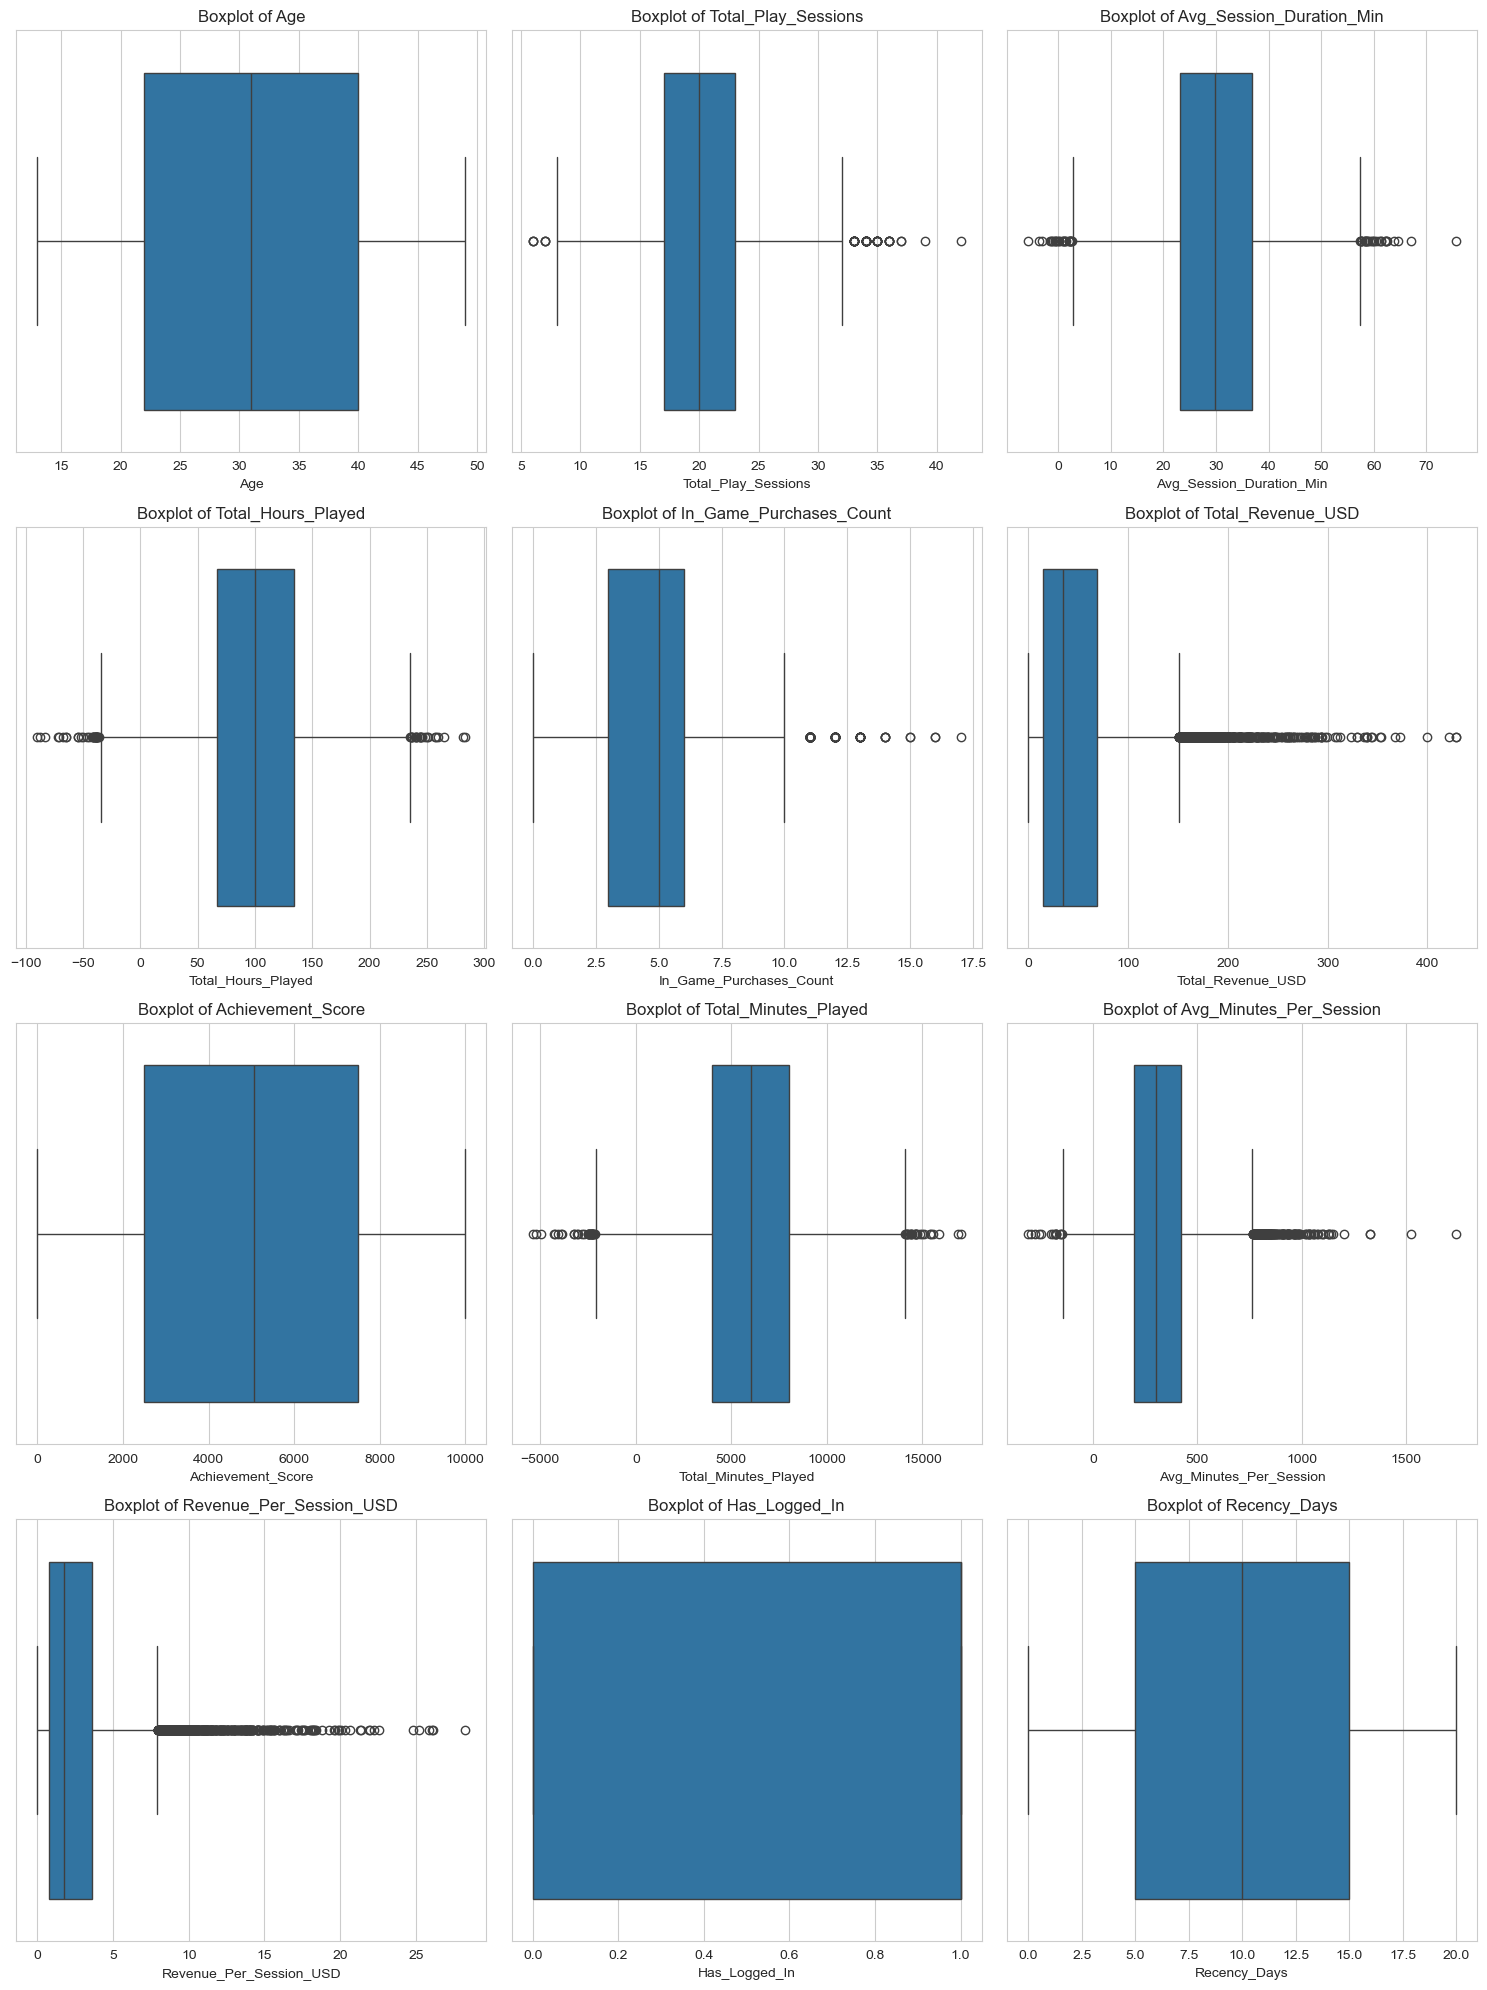

In [60]:
import math 
num_cols = data.select_dtypes(include='number').columns
rows = math.ceil(len(num_cols) / 3)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Bivariate Analysis**

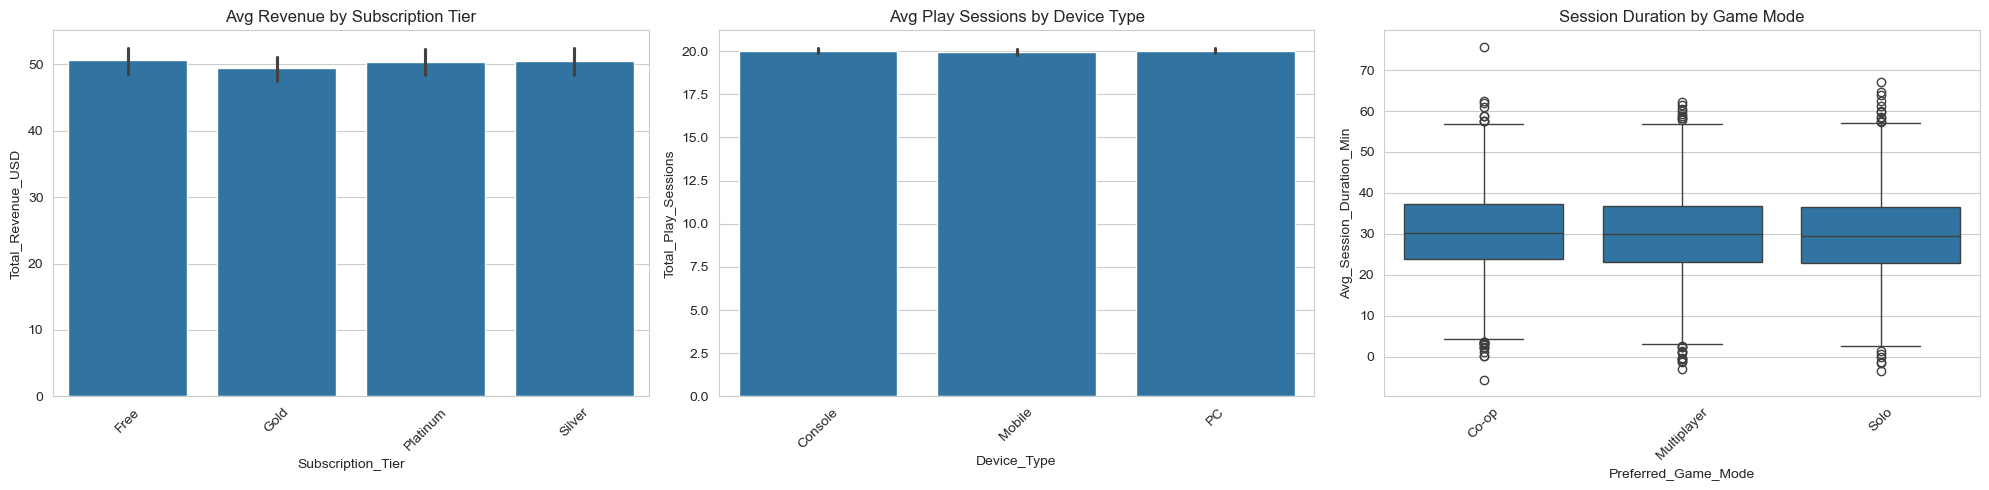

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Revenue by Subscription Tier
sns.barplot(data=data, x='Subscription_Tier', y='Total_Revenue_USD', estimator='mean', ax=axes[0])
axes[0].set_title("Avg Revenue by Subscription Tier")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Play Sessions by Device Type
sns.barplot(data=data, x='Device_Type', y='Total_Play_Sessions', estimator='mean', ax=axes[1])
axes[1].set_title("Avg Play Sessions by Device Type")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Session Duration by Game Mode
sns.boxplot(data=data, x='Preferred_Game_Mode', y='Avg_Session_Duration_Min', ax=axes[2])
axes[2].set_title("Session Duration by Game Mode")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## Inferences
### Avg Revenue by Subscription Tier
**All tiers (Free, Gold, Platinum, Silver) show very similar average revenue (around $50).**

- This is unusual — we typically expect paid tiers to show higher revenue. This suggests either:

- Users on Free tier still spend via in-game purchases.

### Avg Play Sessions by Device Type


- No significant difference in average sessions across device types (Console, Mobile, PC).
### Session Duration by Game Mode

- Consistent medians imply a balanced game mode design.
---


**Corelation Matrix**

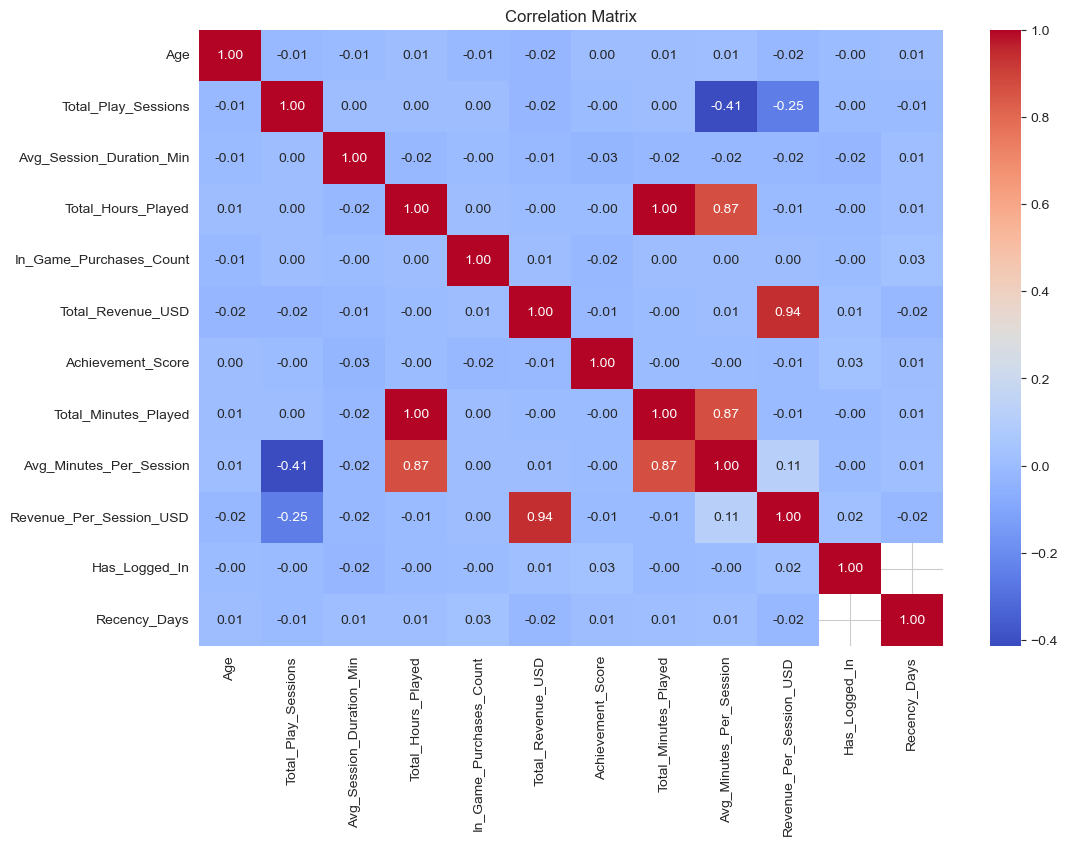

In [61]:
corr = data[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


---

### 📈 Correlation Matrix – Key Inferences

#### 🔹 Strong Positive Correlations (r > 0.85)

* **`Total_Hours_Played` ↔ `Total_Minutes_Played` (r = 1.00)**

  * These two metrics are essentially measuring the same thing, just in different units.
  * 🔍 **Inference:** Players who play more hours obviously accumulate more minutes.

* **`Avg_Minutes_Per_Session` ↔ `Total_Hours_Played` (r = 0.87)**

  * Higher average session durations lead to greater total playtime.
  * 🔍 **Inference:** Longer sessions contribute significantly to total gameplay.

* **`Avg_Minutes_Per_Session` ↔ `Total_Minutes_Played` (r = 0.87)**

  * Same implication as above, reinforcing the importance of session length.
  * 🔍 **Inference:** Session duration is key to overall engagement.

* **`Revenue_Per_Session_USD` ↔ `Total_Revenue_USD` (r = 0.94)**

  * Strongly suggests that revenue per session is a major driver of total revenue.
  * 🔍 **Inference:** Monetization per session is a critical metric for revenue performance.

---


**Categorical Columns Analysis**

In [62]:
data[categorical_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              10000 non-null  category
 1   Gender               10000 non-null  category
 2   Device_Type          10000 non-null  category
 3   Game_Title           10000 non-null  category
 4   Subscription_Tier    10000 non-null  category
 5   Referral_Source      10000 non-null  category
 6   Preferred_Game_Mode  10000 non-null  category
 7   Rank_Tier            10000 non-null  category
dtypes: category(8)
memory usage: 99.2 KB


In [64]:
for col in categorical_col:
    print(f"--- {col} ---")
    print(data[col].value_counts(normalize=True) * 100)
    print("\n")

--- Country ---
Country
Korea                         0.83
Congo                         0.73
Ghana                         0.64
Nauru                         0.60
Gibraltar                     0.57
                              ... 
Slovakia (Slovak Republic)    0.29
Yemen                         0.28
Mauritius                     0.27
Wallis and Futuna             0.26
Cambodia                      0.25
Name: proportion, Length: 243, dtype: float64


--- Gender ---
Gender
Male      33.66
Female    33.28
Other     33.06
Name: proportion, dtype: float64


--- Device_Type ---
Device_Type
Console    33.95
PC         33.04
Mobile     33.01
Name: proportion, dtype: float64


--- Game_Title ---
Game_Title
MysticWar     25.57
QuestRaid     24.86
SpeedRun      24.81
BattleZone    24.76
Name: proportion, dtype: float64


--- Subscription_Tier ---
Subscription_Tier
Free        25.36
Gold        25.36
Silver      25.22
Platinum    24.06
Name: proportion, dtype: float64


--- Referral_Source ---


---

In [70]:
data.to_csv('matiks-clean-data.csv', index=False)